Web Scraping for Task 1

In [ ]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [ ]:
#Web Scraping initiated

ba_url = "https://www.airlinequality.com/airline-reviews/british-airways"
no_pages = 20
reviews_per_page = 100
#https://www.airlinequality.com/airline-reviews/british-airways/page/363/
reviews = []
date_time = []
ratings = []
for i in range(1,no_pages+1):
  print("Scraping from Page",i)
  records_scraped = 0
  url = f"{ba_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={reviews_per_page}"
  response = requests.get(url)
  if response.status_code == 200:
    parsed_content = BeautifulSoup(response.content,'html5')

    for para in parsed_content.find_all("div", {"class": "text_content"}):
      reviews.append(para.get_text())

    for para in parsed_content.find_all("time"):
      date_time.append(para.text)

    for item in parsed_content.find_all("div", class_ = "rating-10"):
      try:
          ratings.append(item.span.text)
      except:
         print(f"Error on page {i}")
         ratings.append("None")

            # Increment the counter for records scraped
      records_scraped += 1
      if records_scraped == reviews_per_page:
          break

    print(f" -->{len(reviews)} No. of reviews")
    print(f" -->{len(ratings)} No. of ratings")
  else:
    print("Error occurred while reading the page{i}")

#Web Scraping completed

Scraping from Page 1
 --100 No. of reviews
 --100 No. of ratings
Scraping from Page 2
 --200 No. of reviews
 --200 No. of ratings
Scraping from Page 3
 --300 No. of reviews
 --300 No. of ratings
Scraping from Page 4
 --400 No. of reviews
 --400 No. of ratings
Scraping from Page 5
 --500 No. of reviews
 --500 No. of ratings
Scraping from Page 6
 --600 No. of reviews
 --600 No. of ratings
Scraping from Page 7
 --700 No. of reviews
 --700 No. of ratings
Scraping from Page 8
 --800 No. of reviews
 --800 No. of ratings
Scraping from Page 9
 --900 No. of reviews
 --900 No. of ratings
Scraping from Page 10
 --1000 No. of reviews
 --1000 No. of ratings
Scraping from Page 11
 --1100 No. of reviews
 --1100 No. of ratings
Scraping from Page 12
 --1200 No. of reviews
 --1200 No. of ratings
Scraping from Page 13
 --1300 No. of reviews
 --1300 No. of ratings
Scraping from Page 14
 --1400 No. of reviews
 --1400 No. of ratings
Scraping from Page 15
 --1500 No. of reviews
 --1500 No. of ratings
Scrapin

In [ ]:
#creating reviews dataframe and fetch first 5 records
df = pd.DataFrame()
df["reviews"] = reviews
df["date"] = date_time
df["ratings"]= ratings
df.head()

,reviews,date,ratings
0,✅ Trip Verified | Easy check in a T5. Galleri...,13th August 2023,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5
1,"Not Verified | Flight delayed by an hour, it ...",12th August 2023,8
2,Not Verified | The staff are very rude and not...,11th August 2023,2
3,✅ Trip Verified | Good domestic flight operat...,8th August 2023,2
4,Not Verified | Failed at all basic travel fund...,8th August 2023,10


In [ ]:
# Extract the year from the 'date' column
import pandas as pd

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# new column -- the extracted year
df.head()

,reviews,date,ratings,year,month
0,✅ Trip Verified | Easy check in a T5. Galleri...,2023-08-13,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,2023,8
1,"Not Verified | Flight delayed by an hour, it ...",2023-08-12,8,2023,8
2,Not Verified | The staff are very rude and not...,2023-08-11,2,2023,8
3,✅ Trip Verified | Good domestic flight operat...,2023-08-08,2,2023,8
4,Not Verified | Failed at all basic travel fund...,2023-08-08,10,2023,8


In [ ]:
# Fetching last 5 records

df.tail()

,reviews,date,ratings,cleaned_reviews
495,✅ Trip Verified | BA cancelled my flight to Ly...,11th June 2020,1,ba cancelled my flight to lyon march april ...
496,✅ Trip Verified | A short hop from London to ...,8th June 2020,1,a short hop from london to edinburgh in nove...
497,✅ Trip Verified | Total rip off. British Airw...,6th June 2020,8,total rip off british airways cancels fligh...
498,Not Verified | I booked flights to Rome from ...,4th June 2020,1,i booked flights to rome from the us and the...
499,✅ Trip Verified | I booked a trip to Spain fo...,29th May 2020,2,i booked a trip to spain for mid march ...


In [ ]:
df.shape

(500, 3)

Preprocessing the text


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:

# Initialize WordNet Lemmatizer
lemma = WordNetLemmatizer()

#create an empty list to collect cleaned data
cleaned_reviews =[]
stop_words = []
#using regular expression
import re
reviews_content= df['reviews'].str.split('|', expand=True)[1]
# Define a function to clean the text
for review in reviews_content:
  if not isinstance(review, str):
    review = str(review)
  review = re.sub('[^A-Za-z]', ' ', review)
  review = re.sub(r'\b\w{1,3}\b', ' ', review)
  review = review.lower()
  for rev in review:
    if rev not in set(stopwords.words("english")):
      rev = (lemma.lemmatize(rev))
    else:
      rev=""

  review = "".join(review)
  cleaned_reviews.append(review)

df["cleaned_reviews"] = cleaned_reviews

# Cleaning the text in the review column
# Strip Verified and Non-Verified from the text
df.head()

,reviews,date,ratings,year,month,cleaned_reviews
0,✅ Trip Verified | Easy check in a T5. Galleri...,2023-08-13,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,2023,8,easy check galleries south north l...
1,"Not Verified | Flight delayed by an hour, it ...",2023-08-12,8,2023,8,flight delayed hour happens biggie...
2,Not Verified | The staff are very rude and not...,2023-08-11,2,2023,8,staff very rude trained properly e...
3,✅ Trip Verified | Good domestic flight operat...,2023-08-08,2,2023,8,good domestic flight operated cityflyer ...
4,Not Verified | Failed at all basic travel fund...,2023-08-08,10,2023,8,failed basic travel fundamentals fl...


In [ ]:
df.isnull().value_counts()

reviews  date   ratings  year   month  cleaned_reviews
False    False  False    False  False  False              2000
dtype: int64

In [ ]:
df.ratings.unique()


array(['\n\t\t\t\t\t\t\t\t\t\t\t\t\t5', '8', '2', '10', '1', '9', '6',
       '4', '3', '7', '5'], dtype=object)

In [ ]:
# remove the \t and \n from the ratings
df['ratings'] = df['ratings'].str.lstrip('\t\n').str.rstrip('\t\n')


In [ ]:
df.head()

,reviews,date,ratings,cleaned_reviews
0,✅ Trip Verified | Easy check in a T5. Galleri...,13th August 2023,5,easy check in a t galleries south and nort...
1,"Not Verified | Flight delayed by an hour, it ...",12th August 2023,8,flight delayed by an hour it happens no bi...
2,Not Verified | The staff are very rude and not...,11th August 2023,2,the staff are very rude and not trained prope...
3,✅ Trip Verified | Good domestic flight operat...,8th August 2023,2,good domestic flight operated by ba cityflye...
4,Not Verified | Failed at all basic travel fund...,8th August 2023,10,failed at all basic travel fundamentals o...


In [ ]:
df['ratings'].value_counts()

1     588
2     267
3     225
10    152
8     149
9     137
5     133
4     132
7     132
6      85
Name: ratings, dtype: int64

In [ ]:
# drop the rows where the value of ratings is None
df.drop(df[df['ratings'] == 'None'].index, axis=0, inplace=True)
df.drop(df[df['ratings'] == 0].index, axis=0, inplace=True)

In [ ]:
df['ratings'].value_counts()
#df.ratings.mean()

1     588
2     267
3     225
10    152
8     149
9     137
5     133
4     132
7     132
6      85
Name: ratings, dtype: int64

Text(0.5, 0.98, 'Counts for each ratings')

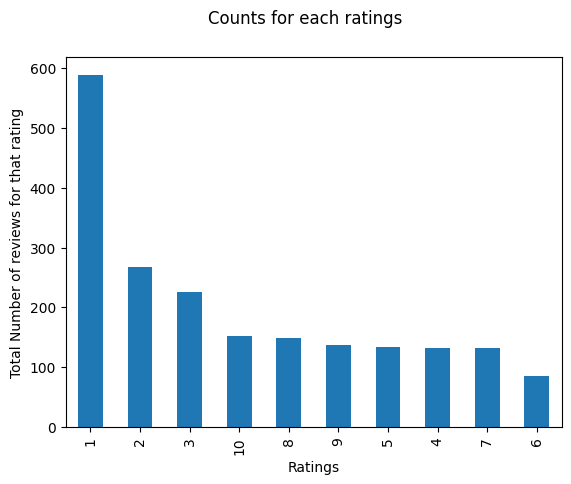

In [ ]:
df.ratings.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews for that rating")
plt.suptitle("Counts for each ratings")

,reviews,date,ratings,cleaned_reviews,year,month
0,✅ Trip Verified | Easy check in a T5. Galleri...,2023-08-13,5,easy check in a t galleries south and nort...,2023,8
1,"Not Verified | Flight delayed by an hour, it ...",2023-08-12,8,flight delayed by an hour it happens no bi...,2023,8
2,Not Verified | The staff are very rude and not...,2023-08-11,2,the staff are very rude and not trained prope...,2023,8
3,✅ Trip Verified | Good domestic flight operat...,2023-08-08,2,good domestic flight operated by ba cityflye...,2023,8
4,Not Verified | Failed at all basic travel fund...,2023-08-08,10,failed at all basic travel fundamentals o...,2023,8


Text(0.5, 1.0, 'Counts for each year')

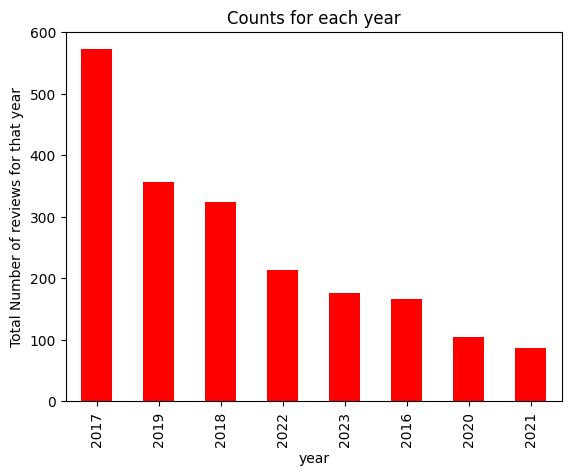

In [ ]:
df.year.value_counts().plot(kind="bar",color="red")
plt.xlabel("year")
plt.ylabel("Total Number of reviews for that year")
plt.title("Counts for each year")

Text(0.5, 0.98, 'Counts for each month')

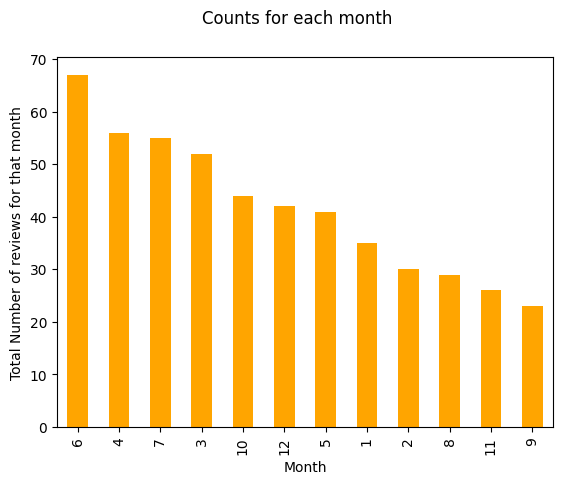

In [ ]:
df.month.value_counts().plot(kind="bar",color="orange")
plt.xlabel("Month")
plt.ylabel("Total Number of reviews for that month")
plt.suptitle("Counts for each month")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


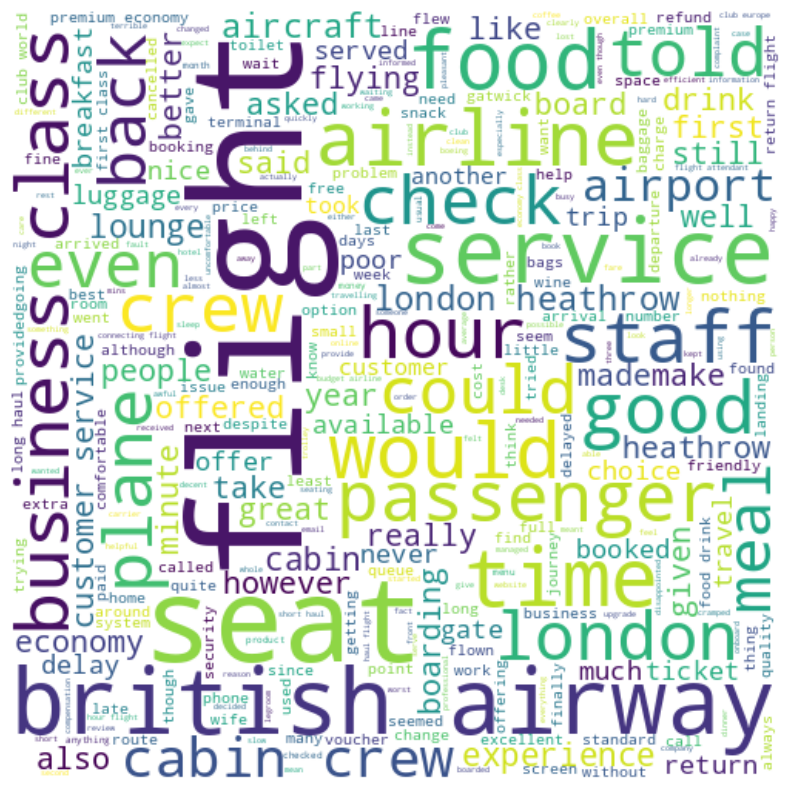

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
# Start with one review:
reviews = " ".join(df.cleaned_reviews)
plt.figure(figsize=(20,10))
stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100,background_color='white',max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

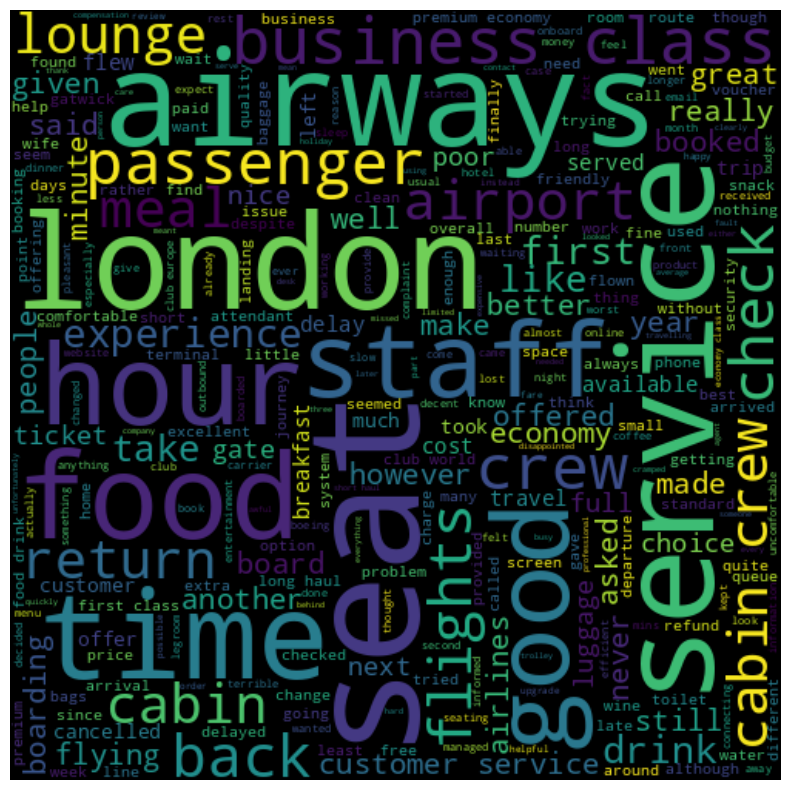

In [ ]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.cleaned_reviews)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would",""])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#Word Frequency
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

words = reviews.split(" ")
#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight','flights', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review",""])

new_words = [word for word in words if word not in stopwords]
nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'service'),
  Text(1, 0, 'food'),
  Text(2, 0, 'seat'),
  Text(3, 0, 'crew'),
  Text(4, 0, 'time'),
  Text(5, 0, 'airways'),
  Text(6, 0, 'class'),
  Text(7, 0, 'cabin'),
  Text(8, 0, 'seats'),
  Text(9, 0, 'good'),
  Text(10, 0, 'staff'),
  Text(11, 0, 'business'),
  Text(12, 0, 'economy'),
  Text(13, 0, 'check'),
  Text(14, 0, 'hours'),
  Text(15, 0, 'flights'),
  Text(16, 0, 'just'),
  Text(17, 0, 'boarding'),
  Text(18, 0, 'passengers'),
  Text(19, 0, 'experience')])

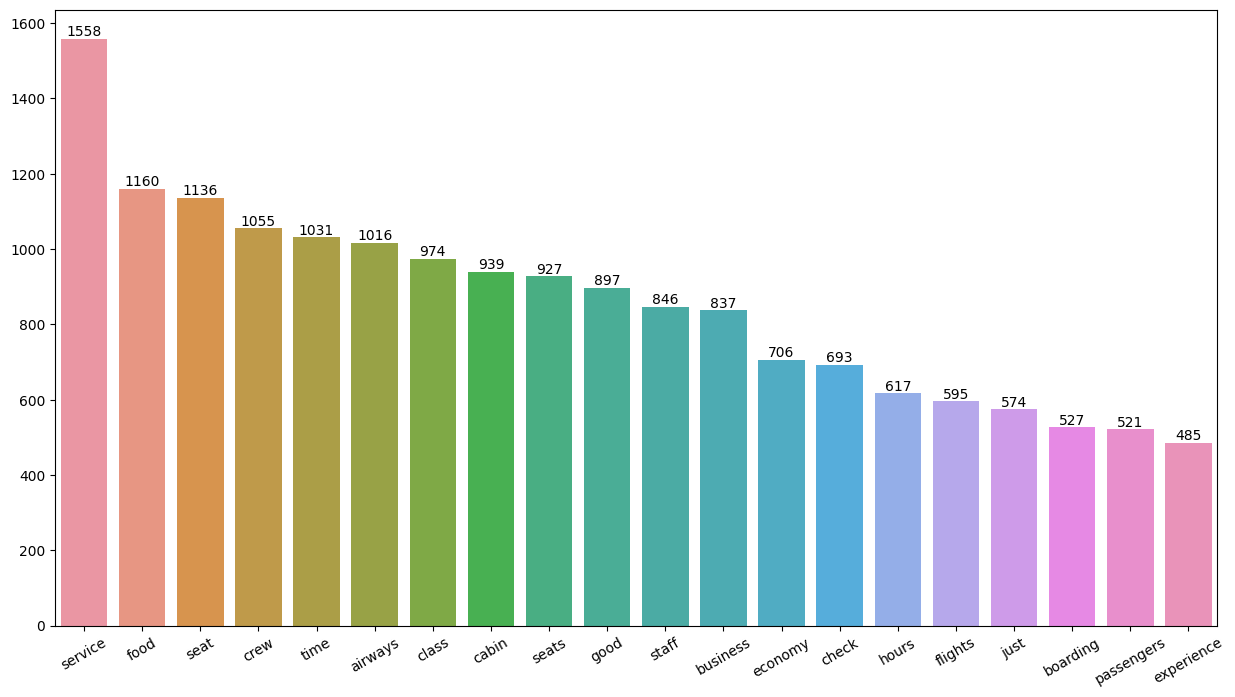

In [ ]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

In [ ]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#set a column Polarity with all 0 values initially
df['polarity'] = 0

for i in range(len(df.cleaned_reviews)):
    sent= TextBlob(df.cleaned_reviews[i])
    polarity  = sent.sentiment.polarity
    subjectivity  = sent.sentiment.subjectivity
    df['polarity'][i] = polarity



In [ ]:
print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")


1447 number of reviews between -0.2 and 0.2 polarity score
903 number of reviews between -0.1 and 0.1 polarity score
638 have negative reviews
1278 have positive reviews
84 have neutral reviews


We can therefore conclude that we have more positive reviews, than negative reviews.

In [ ]:

#df.drop(columns=['Sentiment'], inplace=True)

In [ ]:
def map_polarity_to_feedback(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to update the 'Feedback' column
df['Sentiment_analysis'] = df['polarity'].apply(map_polarity_to_feedback)
df.head()

,reviews,date,ratings,year,month,cleaned_reviews,polarity,Sentiment_analysis
0,✅ Trip Verified | Easy check in a T5. Galleri...,2023-08-13,5,2023,8,easy check galleries south north l...,0.207556,Positive
1,"Not Verified | Flight delayed by an hour, it ...",2023-08-12,8,2023,8,flight delayed hour happens biggie...,0.133333,Positive
2,Not Verified | The staff are very rude and not...,2023-08-11,2,2023,8,staff very rude trained properly e...,-0.360000,Negative
3,✅ Trip Verified | Good domestic flight operat...,2023-08-08,2,2023,8,good domestic flight operated cityflyer ...,0.236111,Positive
4,Not Verified | Failed at all basic travel fund...,2023-08-08,10,2023,8,failed basic travel fundamentals fl...,-0.265714,Negative


In [ ]:
counts = df['Sentiment_analysis'].value_counts()
counts

Positive    1278
Negative     638
Neutral       84
Name: Sentiment_analysis, dtype: int64

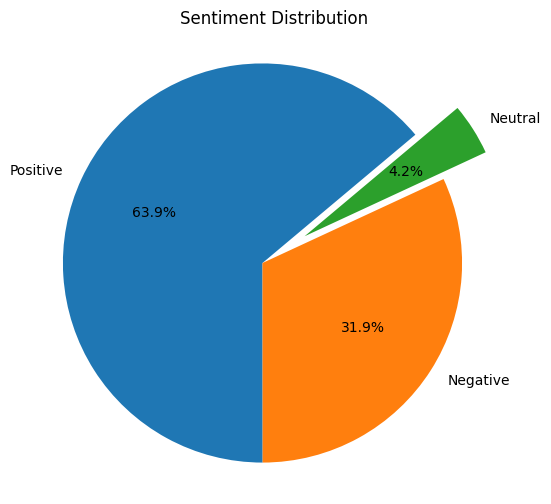

In [ ]:
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts.values, labels=counts.index,explode = (0, 0, 0.25), autopct='%1.1f%%', startangle=40)
plt.title('Sentiment Analysis Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()


In [ ]:
# Export the DataFrame to a CSV file
import os
# Get the current working directory
cd = os.getcwd()
data_folder_path = os.path.join(cd, "data")
if not os.path.exists(data_folder_path):
    # Create the "data" folder if it doesn't exist
    os.makedirs(data_folder_path)

file_path = os.path.join(data_folder_path, "BA_Task1WebScraping.csv")
df.to_csv(file_path, index=False)

# Confirm the export
print("DataFrame exported to CSV file: \data\BA_Task1WebScraping.csv")

DataFrame exported to CSV file: \data\BA_Task1WebScraping.csv
